In [10]:
#Exo7
# Exercise: train and fine-tune a Decision Tree for the moons dataset.

In [2]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

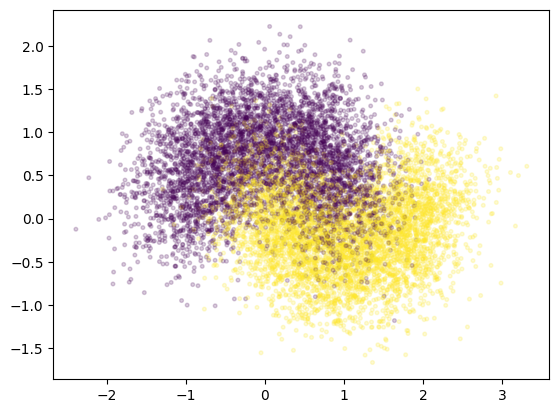

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons, alpha=0.2, s=7)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=67)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

za3bat = DecisionTreeClassifier(random_state=67)

za3bat.fit(X_train, y_train)
prediction = za3bat.predict(X_train)

accuracy_score(y_train, prediction)

1.0

In [6]:
from sklearn.model_selection import GridSearchCV

mehloul = DecisionTreeClassifier(random_state=69)

param_grid = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}

grid = GridSearchCV(mehloul, param_grid, n_jobs=-1, cv=3, scoring="accuracy")
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=69), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [7]:
import pandas as pd

results = pd.DataFrame(grid.cv_results_)
results.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1518,0.029847,9.580988e-03,0.008312,5.543761e-03,6,18,2,"{'max_depth': 6, 'max_leaf_nodes': 18, 'min_sa...",0.855643,0.865392,0.852963,0.857999,0.005341,1
1520,0.016143,1.351449e-03,0.003657,4.706960e-04,6,18,4,"{'max_depth': 6, 'max_leaf_nodes': 18, 'min_sa...",0.855643,0.865392,0.852963,0.857999,0.005341,1
1519,0.015644,1.313342e-03,0.006679,2.246544e-03,6,18,3,"{'max_depth': 6, 'max_leaf_nodes': 18, 'min_sa...",0.855643,0.865392,0.852963,0.857999,0.005341,1
1515,0.024547,1.131399e-02,0.004968,1.096034e-03,6,17,2,"{'max_depth': 6, 'max_leaf_nodes': 17, 'min_sa...",0.853018,0.867642,0.852963,0.857874,0.006906,4
1516,0.014962,2.247832e-07,0.003989,2.247832e-07,6,17,3,"{'max_depth': 6, 'max_leaf_nodes': 17, 'min_sa...",0.853018,0.867642,0.852963,0.857874,0.006906,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.007485,4.069914e-04,0.006984,4.230926e-03,1,71,3,"{'max_depth': 1, 'max_leaf_nodes': 71, 'min_sa...",0.767529,0.781777,0.775319,0.774875,0.005825,1456
209,0.008311,9.406615e-04,0.004398,5.767375e-04,1,71,4,"{'max_depth': 1, 'max_leaf_nodes': 71, 'min_sa...",0.767529,0.781777,0.775319,0.774875,0.005825,1456
210,0.005652,2.351738e-03,0.003990,1.474002e-06,1,72,2,"{'max_depth': 1, 'max_leaf_nodes': 72, 'min_sa...",0.767529,0.781777,0.775319,0.774875,0.005825,1456
203,0.008153,1.306718e-03,0.005318,1.881042e-03,1,69,4,"{'max_depth': 1, 'max_leaf_nodes': 69, 'min_sa...",0.767529,0.781777,0.775319,0.774875,0.005825,1456


In [8]:
yasser = grid.best_estimator_

predictions = yasser.predict(X_test)
accuracy_score(y_test,predictions)

0.8575

In [9]:
#part 2:
# Exercise: Grow a forest.

In [33]:
from sklearn.model_selection import ShuffleSplit

Riad = ShuffleSplit(n_splits=1000, test_size=len(X_train) - 100, random_state=67)

sets = []

for i, (train_index, test_index) in enumerate(Riad.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={len(train_index)}")
    X = X_train[train_index]
    print(f"  Test:  index={test_index}")
    y = y_train[train_index]
    sets.append((X,y))

print(len(sets))

Fold 0:
  Train: index=100
  Test:  index=[2613 1351 6868 ... 7827 7190 4764]
Fold 1:
  Train: index=100
  Test:  index=[3211  758 4381 ...  502 3998 2015]
Fold 2:
  Train: index=100
  Test:  index=[5170 3787 3740 ... 5187  943   19]
Fold 3:
  Train: index=100
  Test:  index=[2577  194 3381 ... 4824 2988 6299]
Fold 4:
  Train: index=100
  Test:  index=[3378 1994 5233 ... 2828 5137 7116]
Fold 5:
  Train: index=100
  Test:  index=[1104 2000  199 ... 7548 4372  643]
Fold 6:
  Train: index=100
  Test:  index=[3704 3901 4430 ... 7136 2189  969]
Fold 7:
  Train: index=100
  Test:  index=[4808 2717 1146 ... 1552 1254 5748]
Fold 8:
  Train: index=100
  Test:  index=[6431 5594 4045 ... 6684 5323 3542]
Fold 9:
  Train: index=100
  Test:  index=[3557  711 4211 ... 1777 6889 7062]
Fold 10:
  Train: index=100
  Test:  index=[3221 3139 2983 ... 2039 3060 3209]
Fold 11:
  Train: index=100
  Test:  index=[3598 5424 1952 ... 5706 2685 7043]
Fold 12:
  Train: index=100
  Test:  index=[5438 2930 4121 ...

In [34]:
from sklearn.base import clone

forest = [clone(yasser) for _ in range(1000)]

for tree, (X_mini_train, y_mini_train) in zip(forest, sets):
    tree.fit(X_mini_train, y_mini_train)

In [35]:
accuracy_score(y_test, forest[67].predict(X_test))

0.8165

In [41]:
import numpy as np

Y_pred = np.empty([1000, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [42]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [43]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.864